<a href="https://colab.research.google.com/github/tanmey007/Spark_Foundation/blob/master/Sparks_Foundation_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import  files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Uploading dataset

In [2]:
source = 'http://bit.ly/w-data'
dataset=pd.read_csv(source)

## Visualisation of data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


It means we have no missing values

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Average hours a student studies is approximately 5

Average score we have is 51.48

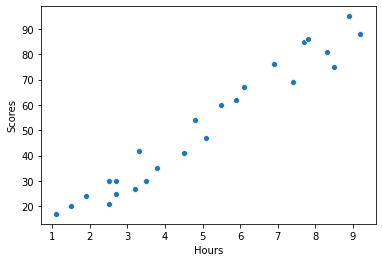

In [5]:
sns.scatterplot(x='Hours',y='Scores',data=dataset)

There seems to be a linear relation between Scores and Hours

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

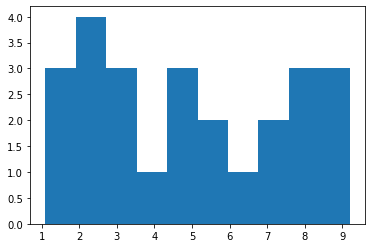

In [6]:
plt.hist(dataset['Hours'])

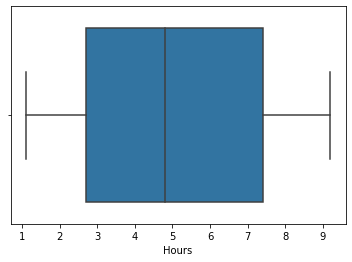

In [7]:
sns.boxplot(x='Hours',data=dataset)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

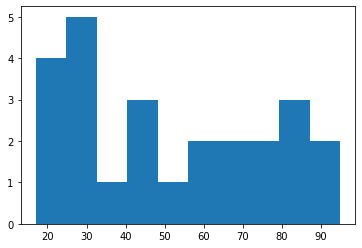

In [8]:
plt.hist(dataset['Scores'])

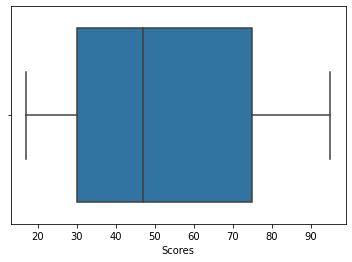

In [9]:
sns.boxplot(x='Scores',data=dataset)

## Creating Training and Test Set

In [10]:
y=dataset['Scores'].copy()
X=dataset.drop('Scores',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)

## Linear Regression

In [11]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Prediction by model

In [12]:
y_pred=lr.predict(X_test)

## Evaluation of Model

In [13]:
r2_score(y_test,y_pred)

0.9248556597026296

92% of variance is captured by the model

In [14]:
lm_mse=mean_squared_error(y_test,y_pred)
lm_rmse=np.sqrt(lm_mse)
lm_rmse

6.222294368470763

Root Mean Squared error is about 6.22 

## Visualisation of Model

### Visualisation of Model Performance on Training data

Text(0, 0.5, 'Scores')

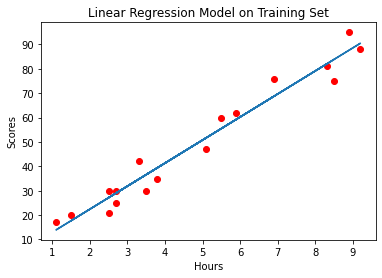

In [15]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train))
plt.title('Linear Regression Model on Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores')

### Visualisation of Model Performance on Test data

Text(0, 0.5, 'Scores')

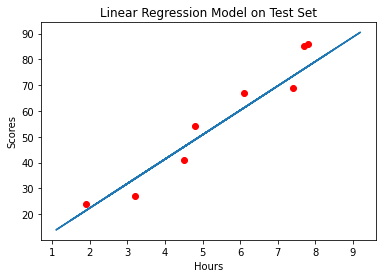

In [16]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,lr.predict(X_train))
plt.title('Linear Regression Model on Test Set')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [17]:
lr.predict([[9.25]])

array([90.96001897])

In [18]:
lr.coef_

array([9.45348802])

In [19]:
lr.intercept_

3.515254764604933

## Compiling result

In [20]:
model_output=pd.DataFrame(y_pred,index=X_test.index,columns=['Model Output'])

In [21]:
actual_output=pd.DataFrame(y_test,index=X_test.index)

In [22]:
final_output=pd.concat([X_test,actual_output,model_output],axis=1)

In [23]:
final_output.to_csv('linear_regression_hours_scores.csv')
files.download('linear_regression_hours_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>